This note provides basic idea to check the normality and understand the statistics of the return data. It can help you to link to our lectures on the lognormal and normal properties of stock price and returns.

Load libraries

In [1]:
import numpy as np  # array operations
import pandas as pd  # dataframe
import scipy.stats as scs
import statsmodels.api as sm
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline


# 1. A stock

Download some stock data from the Yahoo Finance as we did in the first tutor.

In [4]:
from pandas_datareader import data
TSM = data.DataReader("TSM", start='2010-1-1', end='2019-12-31', data_source='yahoo')
TSM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,11.50,11.25,11.26,11.44,7414700.0,8.010158
2010-01-04,11.69,11.47,11.49,11.58,8096400.0,8.108187
2010-01-05,11.66,11.46,11.60,11.53,14375900.0,8.073175
2010-01-06,11.61,11.38,11.56,11.49,13608400.0,8.045170
2010-01-07,11.44,11.07,11.41,11.11,27346600.0,7.779099


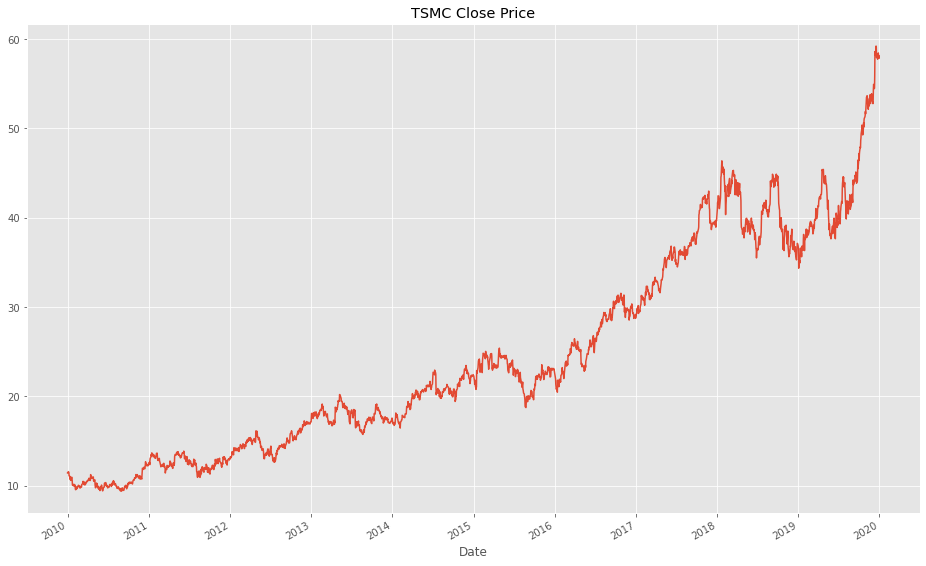

In [41]:
TSM['Close'].plot(figsize=(16, 10), grid=True, title='TSMC Close Price')

In [42]:
TSM['Return'] = np.log(TSM['Close'] / TSM['Close'].shift(1))
TSM


,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2009-12-31,11.500000,11.250000,11.260000,11.440000,7414700.0,8.010158,NaN
2010-01-04,11.690000,11.470000,11.490000,11.580000,8096400.0,8.108187,0.012164
2010-01-05,11.660000,11.460000,11.600000,11.530000,14375900.0,8.073175,-0.004327
2010-01-06,11.610000,11.380000,11.560000,11.490000,13608400.0,8.045170,-0.003475
2010-01-07,11.440000,11.070000,11.410000,11.110000,27346600.0,7.779099,-0.033631
...,...,...,...,...,...,...,...
2019-12-24,58.090000,57.549999,57.990002,57.759998,2692200.0,57.217155,-0.007932
2019-12-26,58.349998,57.759998,57.799999,58.250000,2490400.0,57.702553,0.008448
2019-12-27,58.709999,58.330002,58.529999,58.459999,2847800.0,57.910580,0.003599


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDB9328C8>,
      dtype=object)

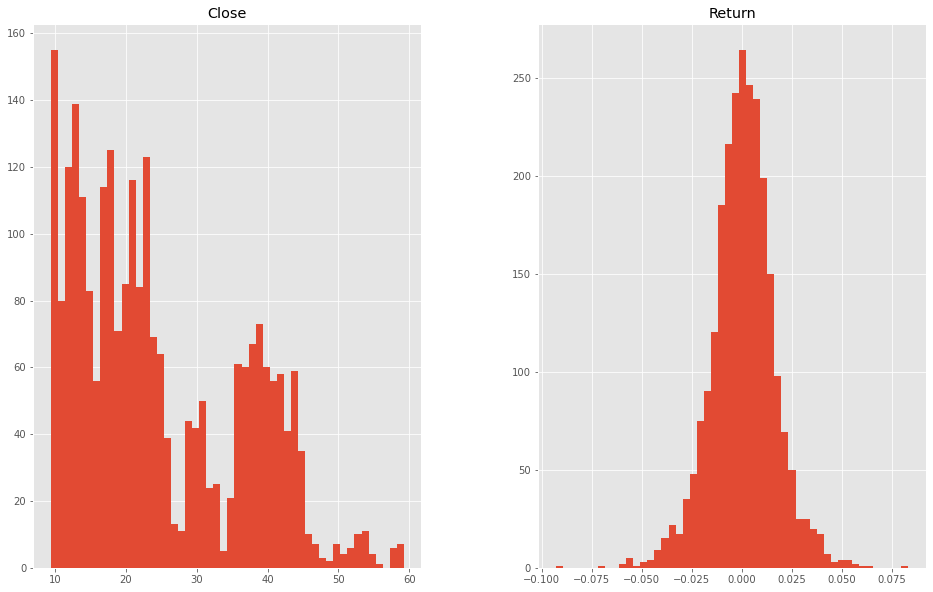

In [43]:
TSM[['Close', 'Return']].hist(bins=50, figsize=(16, 10))

In [44]:
TSM[['Close', 'Return']].describe()

,Close,Return
count,2517.000000,2516.000000
mean,24.548105,0.000646
std,11.577571,0.015773
min,9.400000,-0.093090
25%,14.650000,-0.008483
50%,21.389999,0.000830
75%,35.639999,0.010017
max,59.230000,0.083325


In [45]:
scs.describe(TSM['Return'].dropna()) # to see skewness & kurtosis

DescribeResult(nobs=2516, minmax=(-0.09309049618797655, 0.08332462595295649), mean=0.0006458862036259988, variance=0.0002487944110843154, skewness=-0.10063501451673636, kurtosis=1.8044730335950998)

Another good skim for the normality data is to check the Q-Q plot:


Text(0, 0.5, 'sample quantiles')

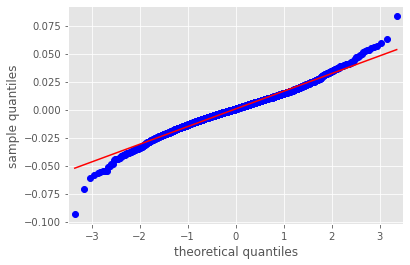

In [46]:
sm.qqplot(TSM['Return'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Lastly, we do the normality test. `scipy` gives us several functions to do the test:

- [`skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest)
- [`kurtosistest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest)
- [`normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest)


In [47]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    
normality_tests(TSM['Return'].dropna())

Skew of data set          -0.101
Skew test p-value          0.039
Kurt of data set           1.804
Kurt test p-value          0.000
Norm test p-value          0.000


Now, please read the results and conclude.

# 2. The market index

While a stock return may has some bias due to firm-specific risk, we may find normality from the market returns, which is the value-weighted returns from many stocks. Let's take the market returns from Fama-French database.

In [31]:
Factors5 = data.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench', start='1925-01-01')

In [32]:
Factors5[0].head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1963-08,5.07,-0.79,1.67,0.39,-0.40,0.25
1963-09,-1.57,-0.48,0.18,-0.76,0.24,0.27
1963-10,2.53,-1.29,-0.10,2.75,-2.24,0.29
1963-11,-0.85,-0.84,1.71,-0.45,2.22,0.27


In [33]:
Factors5[0]['Mkt'] = Factors5[0]['Mkt-RF'] + Factors5[0]['RF'] # get market returns from excess returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DDB89D708>,
      dtype=object)

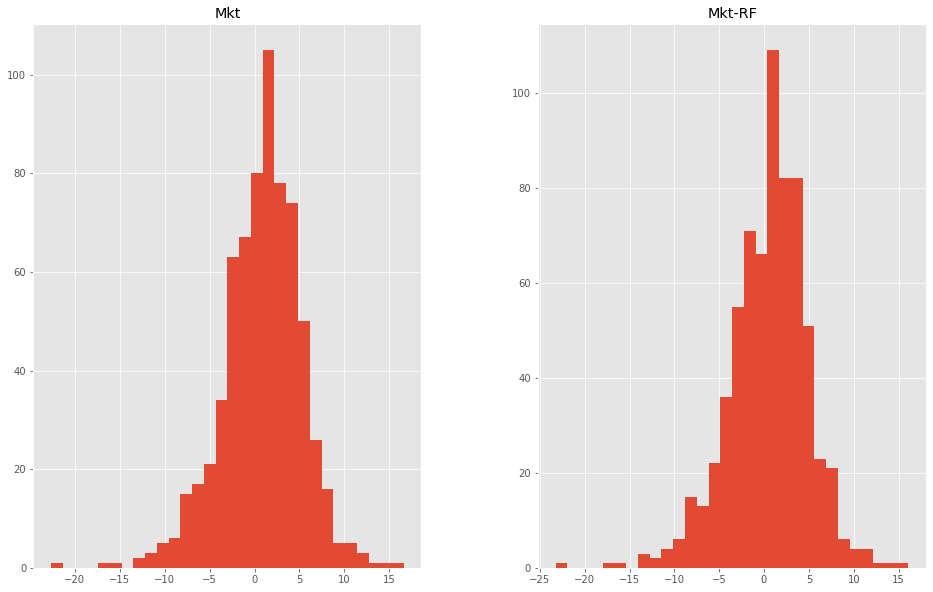

In [34]:
Factors5[0][['Mkt', 'Mkt-RF']].hist(bins=30, figsize=(16, 10))

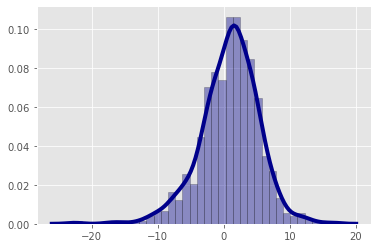

In [35]:
# another way
import seaborn as sns
sns.distplot(Factors5[0][['Mkt']], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

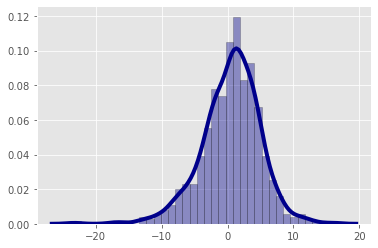

In [36]:
sns.distplot(Factors5[0][['Mkt-RF']], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Let's check some statistics. We'll rely on the [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) package. 

In [37]:
Mkt = Factors5[0]['Mkt']
Mkt.describe()

count    681.000000
mean       0.884493
std        4.409234
min      -22.640000
25%       -1.660000
50%        1.250000
75%        3.730000
max       16.610000
Name: Mkt, dtype: float64

In [48]:
scs.describe(Mkt)

DescribeResult(nobs=681, minmax=(-22.639999999999997, 16.610000000000003), mean=0.8844933920704846, variance=19.441348015029803, skewness=-0.5457465003117492, kurtosis=1.9490763189323603)

In [39]:
scs.scoreatpercentile(Mkt, 5), scs.scoreatpercentile(Mkt, 95)

(-6.84, 7.43)

In [50]:
normality_tests(Mkt)

Skew of data set          -0.546
Skew test p-value          0.000
Kurt of data set           1.949
Kurt test p-value          0.000
Norm test p-value          0.000
